In [35]:
import numpy as np
import pandas as pd
import math
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN

import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns

from acquire import get_the_data
from prepare import prepare_the_data

### Use clustering to detect outliers

In [36]:
df = prepare_the_data(get_the_data())

In [37]:
df['times_accessed'] = 1

In [38]:
df = df[['times_accessed']].resample('d').sum()

In [39]:
df.head()

,times_accessed
timestamp,
2018-01-26,572
2018-01-27,230
2018-01-28,170
2018-01-29,830
2018-01-30,652


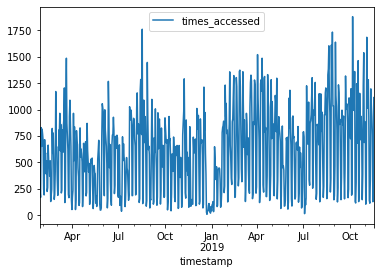

In [40]:
df.plot()

In [41]:
scaler = MinMaxScaler().fit(df)

In [42]:
np_array = scaler.transform(df)

In [43]:
np_array[0:10]

array([[0.30069556],
       [0.11771001],
       [0.08560728],
       [0.43873729],
       [0.3434992 ],
       [0.43124666],
       [0.40502943],
       [0.37239165],
       [0.12787587],
       [0.09791332]])

In [44]:
dbsc = DBSCAN(eps = .01, min_samples = 10).fit(df)

In [45]:
columns = list(df.columns)
scaled_columns = ["Scaled_" + column for column in columns]

In [46]:
original_df = df.copy()

In [47]:
scaled_df = pd.DataFrame(np_array, columns=scaled_columns)

In [48]:
df = df.merge(scaled_df, on=df.index)
df = df.drop(columns=['key_0'])

In [49]:
df.head()

,times_accessed,Scaled_times_accessed
0,572,0.300696
1,230,0.117710
2,170,0.085607
3,830,0.438737
4,652,0.343499


In [50]:
labels = dbsc.labels_
labels[0:10]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [51]:
df['labels'] = labels
df.labels.value_counts()

-1    663
Name: labels, dtype: int64